# Graduate Admissions

The aim of this notebook is to use the Graduate Admissions dataset to practice exploratory data analysis, data visualiztion and modelling using Machine Learning methods as well as basic Deep Learning methods. <br>

The GA dataset contains various paraameters which are important for admission into graduate programs in universities. They are:

<ul>

<li>GRE Scores ( out of 340 )</li> 
<li>TOEFL Scores ( out of 120 )</li> 
<li>University Rating ( out of 5 ) 
<li>Statement of Purpose and Letter of Recommendation Strength ( out of 5 )  
<li>Undergraduate GPA ( out of 10 )  
<li>Research Experience ( either 0 or 1 ) 
<li>Chance of Admit ( ranging from 0 to 1 )

</ul>

Dataset link, References, Acknowledgements given at the end. All comments appreciated since this is my first notebook submission on Kaggle.<br>

## Index

<ul>
    <li><a href='#1'>Preprocessing</a></li>
    <li><a href='#2'>Exploratory Data Analysis (EDA) and Data Visualizations</a>
        <ul>
           <li><a href='#3'>Pair-wise plots</a></li>
           <li><a href='#4'>Heatmaps</a></li>
           <li><a href='#5'>Regression Plots</a></li>
           <li><a href='#6'>Frequency Plots</a></li>
           <li><a href='#7'>Joint Plots</a></li>
           <li><a href='#8'>Categorical Plots</a></li>
        </ul>
    </li>
    <li><a href='#9'>Making Machine Learning models</a>
        <ul>
           <li><a href='#10'>Logistic regression</a></li>
           <li><a href='#11'>Support Vector Classifier</a></li>
           <li><a href='#12'>Decision Tree Classifier</a></li>
           <li><a href='#13'>Random Forest Classifier</a></li>
           <li><a href='#14'>Gradient Boosting Classifier</a></li>
           <li><a href='#15'>Naive Bayes</a></li>
           <li><a href='#16'>K Nearest Neighbors</a></li>
           <li><a href='#17'>Gaussian Process Classifier</a></li>
           <li><a href='#18'>AdaBoost Classifier</a></li>
           <li><a href='#19'>MLP Classifier</a></li>
        </ul>
    </li>
    <li><a href='#20'>Conclusion</a></li>
    <li><a href='#21'>References</a></li>
</ul>

<p id='1'><h2>Preprocessing</h2></p>

I will be importing all the needed libraries except the basic ones as and when they are needed to help in seeing their requirement and uses easily. Some of the basic libraries I am importing are:

<ul>
    <li><a href='https://numpy.org/doc/'>Numpy</a></li>
    <li><a href='https://pandas.pydata.org/docs/'>Pandas</a></li>
    <li><a href='https://seaborn.pydata.org/'>Seaborn</a></li>
    <li><a href='https://matplotlib.org/'>MatPlotLib</a></li>
</ul>    

<br>

In [1]:
import numpy as np                 #for matrix analysis etc 
import pandas as pd                #for loading and viewing the dataset
import seaborn as sns              #for really cool visuallizations
import matplotlib.pyplot as plt    #for more visualizations

%matplotlib inline   

<br> 
Now that we have imported the basic libraries, let's go load up the data. Reading the data will be done by using **Pandas** ```.read_csv()``` method which reads CSV (Comma Seperated Values) files. We will store that in the *dataset* variable.
<br>

In [2]:
dataset = pd.read_csv('../kaggle/Admission_Predict_Ver1.1.csv', index_col='Serial No.')
dataset.head(5)   #Shows the top 5 results

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dataset.shape

(500, 8)

As we can see, ```.shape```  attribute shows the shape of the pandas dataframe. We can see that there are 500 examples in this dataset. Let's do some formatting so that the dataframe looks a bit better.

In [4]:
#Removing the 'Serial No.' name of the first column.
dataset.index.name = None
dataset.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


As you can see, all the column names have spaces in them. In Pandas, it is really hard to reffer to these columns if they have spaces in them for some reason. Hence, let's remove all spaces in the column names.

In [5]:
#Removing space from column names
dataset.columns = dataset.columns.str.replace(' ', '')
dataset.head(5)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
dataset[["ChanceofAdmit"]].head()  #This wouldn't have been possible with spaces

,ChanceofAdmit
1,0.92
2,0.76
3,0.72
4,0.80
5,0.65


In [7]:
#Checking if the data types are right...
dataset.dtypes

GREScore              int64
TOEFLScore            int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceofAdmit       float64
dtype: object

In [8]:
#Getting the .info() stats
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GREScore          500 non-null    int64  
 1   TOEFLScore        500 non-null    int64  
 2   UniversityRating  500 non-null    int64  
 3   SOP               500 non-null    float64
 4   LOR               500 non-null    float64
 5   CGPA              500 non-null    float64
 6   Research          500 non-null    int64  
 7   ChanceofAdmit     500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


As you can see, there is no null or NaN values in the dataset as it has been mostly cleaned up beforehand. That is why I chose this dataset for my first notebook. But still, let's use commands to confirm for null values.

In [9]:
dataset.isnull().values.any()

False

In [10]:
dataset.isnull().sum()

GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceofAdmit       0
dtype: int64

As you can see, no null values. This considerably decreases the time required for the preprocessing stage.

<p id='2'><h2>Exploratory Data Analysis (EDA) and Data Visualizations</h2></p>

Given that the dataset has been successfully loaded in the ```dataset``` variable, we can now be on our way to analysing the data, making inferences and visualizing it in beautiful graphs and plots. <br><br>
But before that we will use the most common visualization for fun; we will use the Seaborn ```.pairplot()``` function.

<p id=3><h3>Pair-wise plots</h3></p>

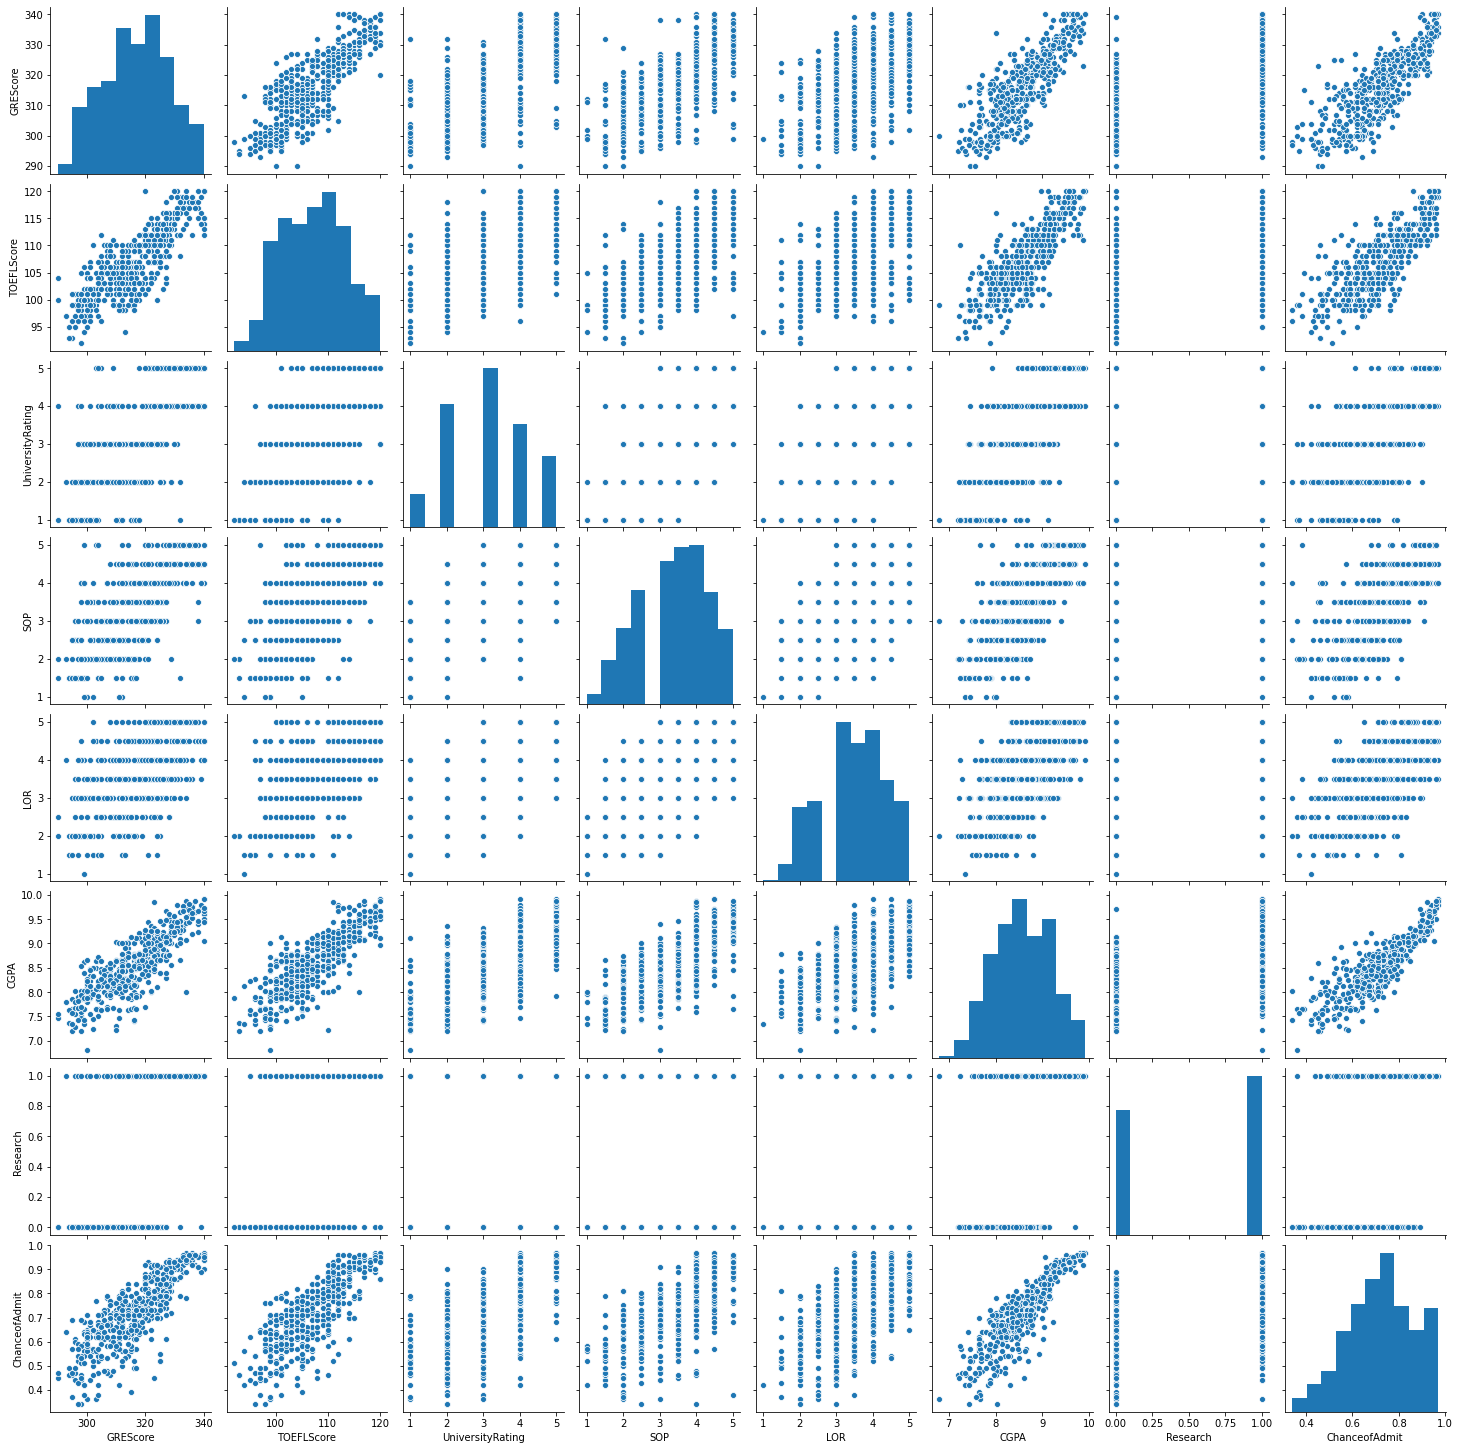

In [11]:
sns.pairplot(dataset)
plt.show()

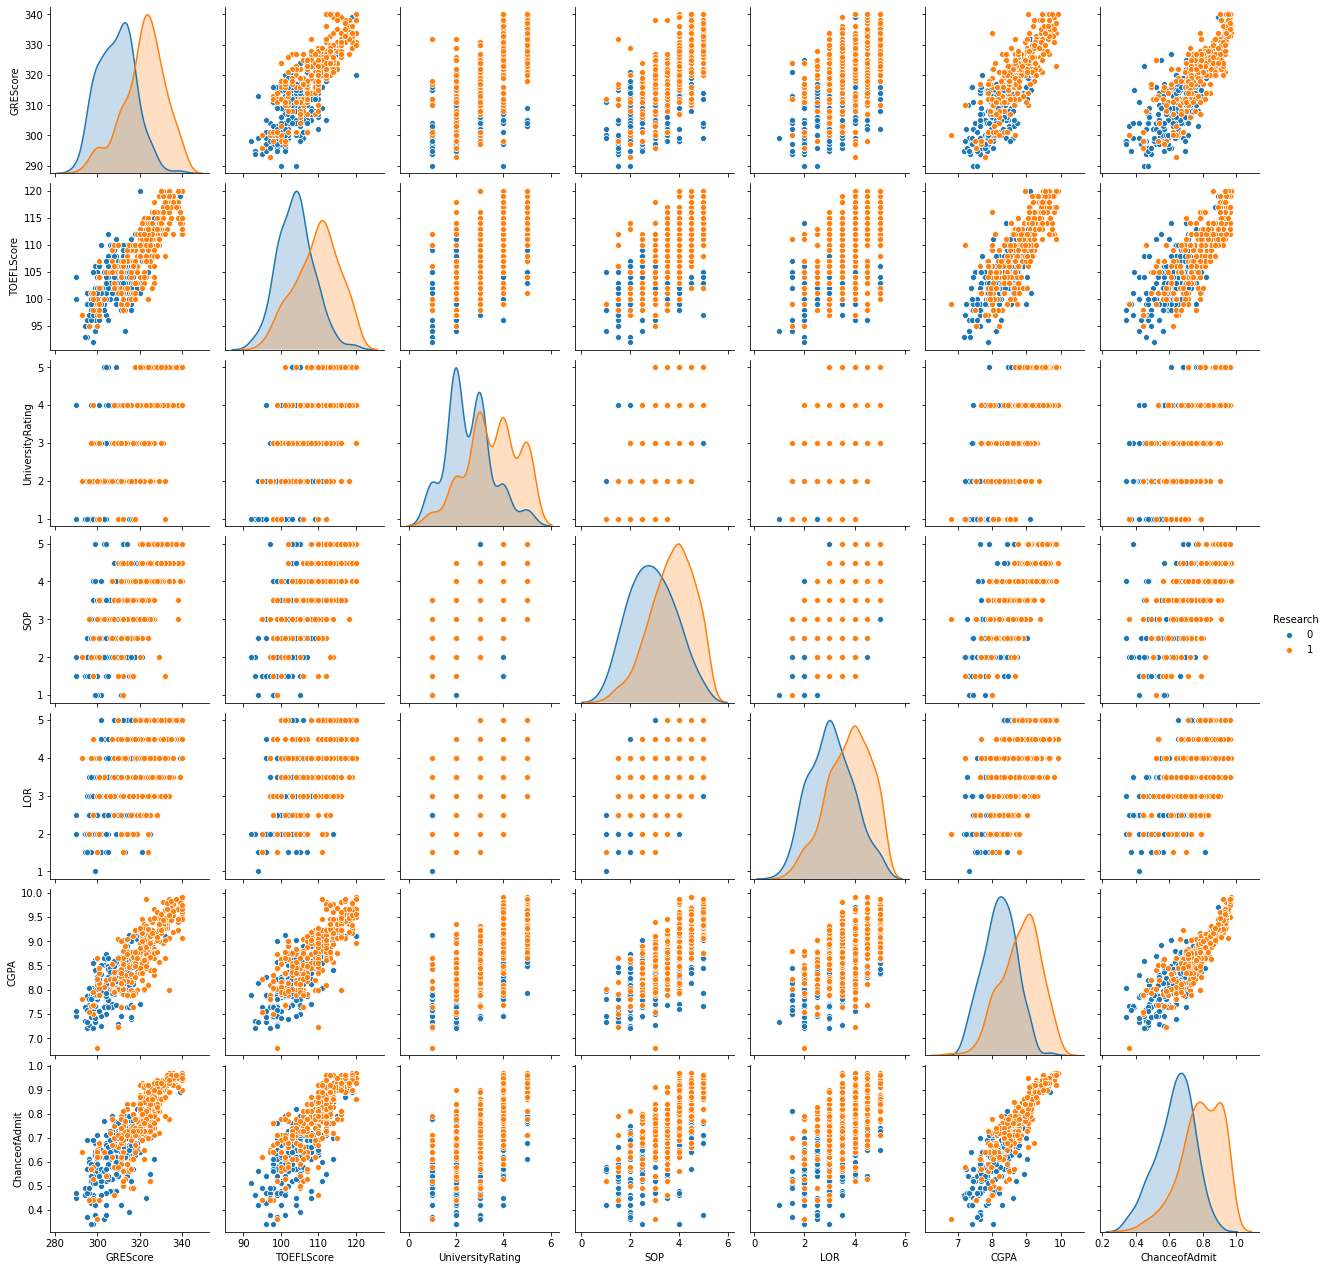

In [12]:
sns.pairplot(dataset, hue="Research")  #Checking values with research as color

What does the ```.pairplot()```function do? <br>
Essentially, it takes two columns at a time and makes graphs for them all, with the positive diagnoal being the histograms of values of those columns from the dataset.<br><br>
See the last row of plots which show the *Chance of Admit* vs everything else. We can infer that for almost all of them, some sort of linear relation exists.<br>
Let's see how strong or weak this linear relation is.

In [13]:
dataset.corr()    #Tells the correlation factor for each of the columns.

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
ChanceofAdmit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


As we can see from the last row of the table above, the correlation for ***'Chance of Admit'*** is strongest with **'CGPA'**, then **'GRE Score'** and lastly the **'TOEFL Score'**. We can infer that these are **really** important for the chance of admit function as it varies almost about linearly with the mentioned factors. Hence having a higher value in these areas is key for you graduate admissions!!! <br> <br>

Let us make some heatmaps for better visualization of these correlations.

<p id=4><h3>Heatmaps</h3></p>

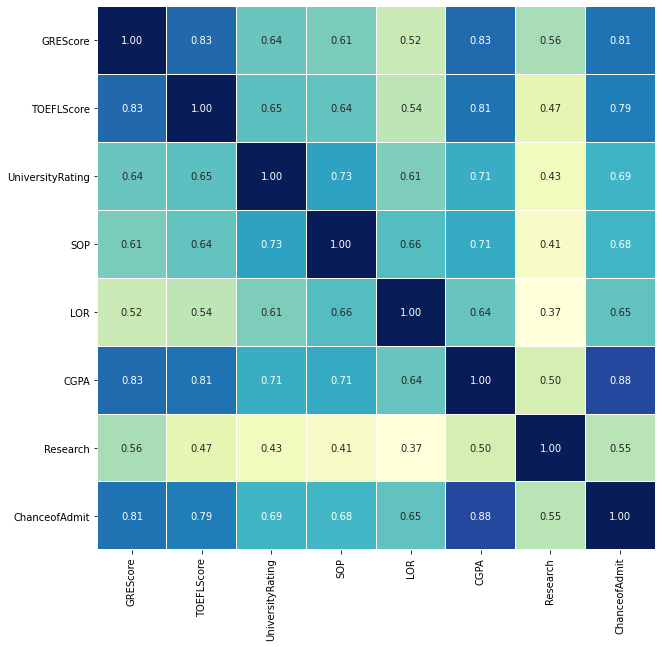

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.05, fmt= '.2f', cmap="YlGnBu", cbar= False)
plt.show()

Above is simple heatmap from Seaborn, taking oneline of simple code. But it shows a mirror image from the diagonal elements, which might not be required. Let's try to remove that now.

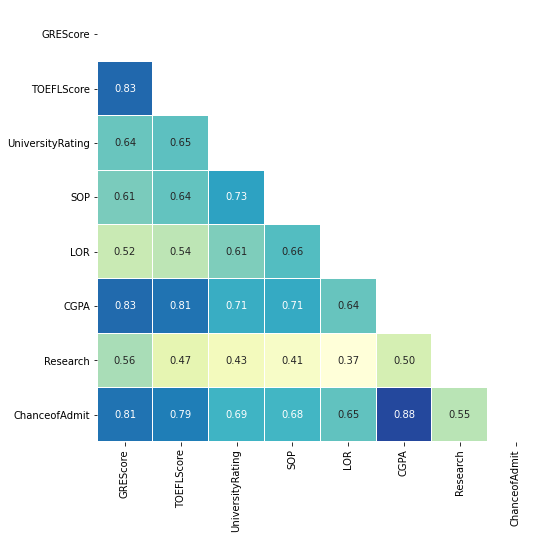

In [15]:
corr = dataset.corr()
mask = np.zeros_like(corr)                  #Makes a zero matrix with same shape as corr
mask[np.triu_indices_from(mask)] = True     #puts the upper triangle elements as true

#Plotting
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.05, fmt= '.2f', cmap="YlGnBu", cbar= False, mask=mask)
plt.show()

<p id=5><h3>Regression Plots</h3></p>

Now, let's make regression plots of Chance of Admit with the CGPA, GRE Score and TOEFL Score.

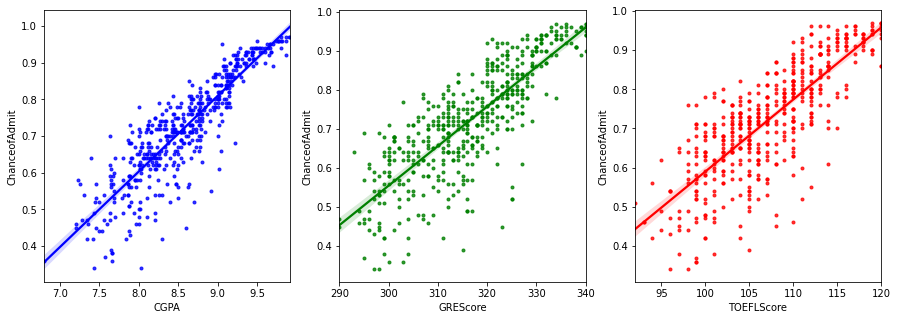

In [16]:
fig , (axis1, axis2 ,axis3) = plt.subplots(1,3,figsize=(15,5))                          #Making the structure
sns.regplot(x='CGPA', y='ChanceofAdmit', data=dataset, color='b', marker='.', ax= axis1)            
sns.regplot(x='GREScore', y='ChanceofAdmit', data=dataset, color='g', marker='.', ax= axis2)
sns.regplot(x='TOEFLScore', y='ChanceofAdmit' ,data=dataset , color='r', marker='.', ax= axis3)
plt.show()

We can see that the CGPA line clearly fits better than the other two, indicating it's linearity with the Chance of Admit.

**Let's have some fun with visualization and make some cool looking plots.**

<p id='6'><h3>Frequency Plots</h3></p>

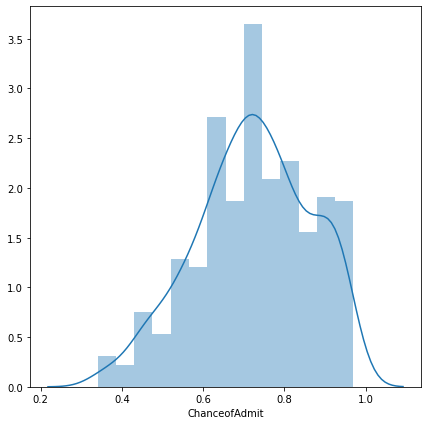

In [17]:
plt.figure(figsize=(7,7))
sns.distplot(dataset.ChanceofAdmit)
plt.show()

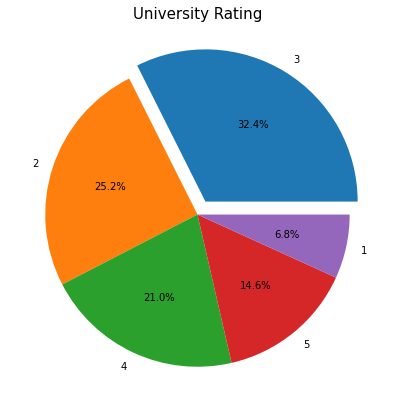

In [18]:
explode = [0.1,0,0,0,0]
plt.figure(figsize=(7,7))
plt.pie(dataset.UniversityRating.value_counts().values,explode=explode,labels=dataset.UniversityRating.value_counts().index,autopct='%1.1f%%')
plt.title('University Rating',fontsize=15)
plt.show()

<p id=7><h3>Joint Plot</h3></p>

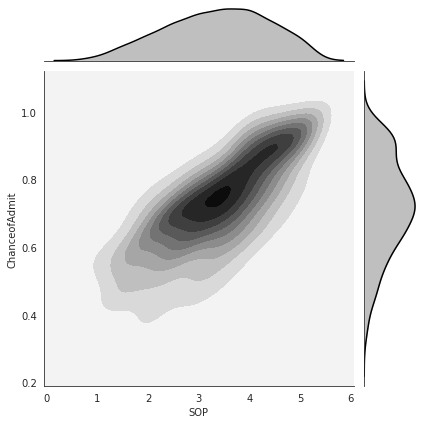

In [19]:
with sns.axes_style("white"):
    sns.jointplot("SOP","ChanceofAdmit", kind="kde", color="black", data=dataset)

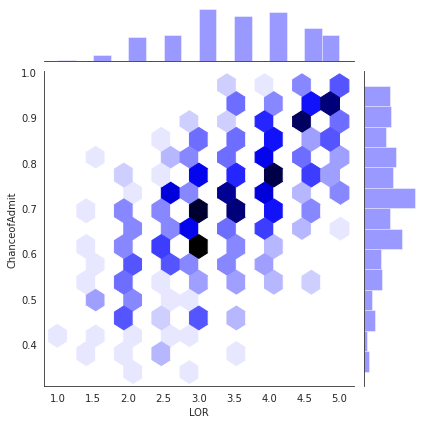

In [20]:
with sns.axes_style("white"):
    sns.jointplot("LOR","ChanceofAdmit", kind="hex", color="blue", data=dataset)

**Inference** : As you might notice from the above graphs, the most common combination values for the specific axis as weel as the nature of the curves. The SOP vs Chance graph shows an almost linear nature in it as well.

<p id=8><h3>Categorical Plots</h3><p>

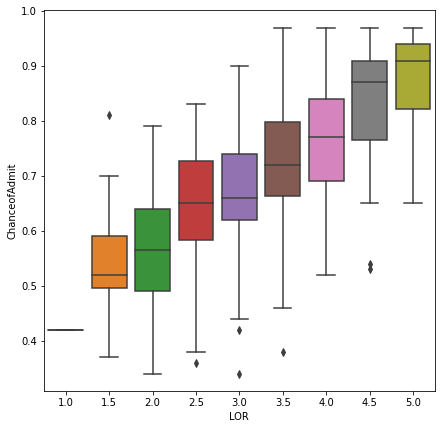

In [21]:
plt.figure(figsize=(7,7))
sns.boxplot("LOR","ChanceofAdmit", data=dataset)
plt.show()

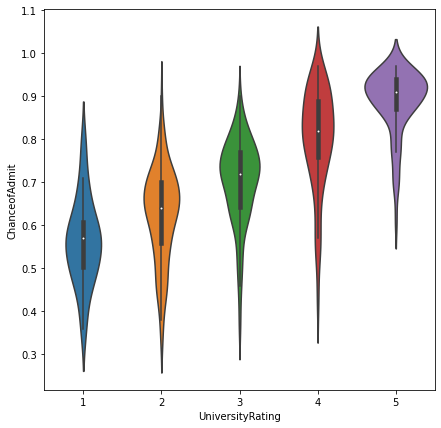

In [22]:
plt.figure(figsize=(7,7))
sns.violinplot("UniversityRating","ChanceofAdmit", data=dataset)
plt.show()

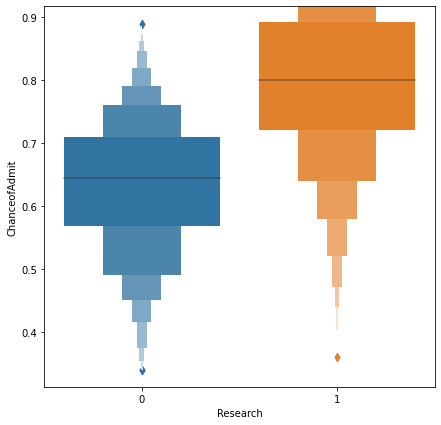

In [23]:
plt.figure(figsize=(7,7))
sns.boxenplot("Research","ChanceofAdmit", data=dataset)
plt.show()

We can tell that on average, people who have some research experience have a higher chance of getting admission than otherwise. Similarly, various inferences can be made from the above plots seeing the mean values of the categories.

<p id=9><h2>Making Machine Learning models</h2></p> 

While modelling the data, it's necessary to convert the problem into one that can be solved by existing modelling techniques. Since, this data is used to predict the chance of someone getting into their desired grad school, let's convert the data to a **classification** problem. <br><br>
Let's do some preprocessing now.

In [106]:
# Converting the labels to binary values for classification
df = dataset.copy()
df['ChanceofAdmit'] = [1 if chance>=0.75 else 0 for chance in dataset['ChanceofAdmit']]
df

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
1,337,118,4,4.5,4.5,9.65,1,1
2,324,107,4,4.0,4.5,8.87,1,1
3,316,104,3,3.0,3.5,8.00,1,0
4,322,110,3,3.5,2.5,8.67,1,1
5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,1
497,337,117,5,5.0,5.0,9.87,1,1
498,330,120,5,4.5,5.0,9.56,1,1
499,312,103,4,4.0,5.0,8.43,0,0


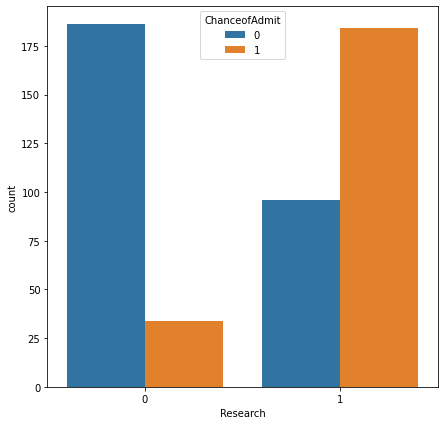

In [155]:
plt.figure(figsize=(7,7))
sns.countplot("Research",hue="ChanceofAdmit", data=df)

In [136]:
counts =  df[['Research','ChanceofAdmit']].groupby(['Research','ChanceofAdmit']).size().sort_values(ascending=False)
counts

Research  ChanceofAdmit
0         0                186
1         1                184
          0                 96
0         1                 34
dtype: int64

In [27]:
df.drop(['Research'],axis=1, inplace=True)  #Since research has little to no importance to the prediction
df

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,ChanceofAdmit
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,0
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1
497,337,117,5,5.0,5.0,9.87,1
498,330,120,5,4.5,5.0,9.56,1
499,312,103,4,4.0,5.0,8.43,0


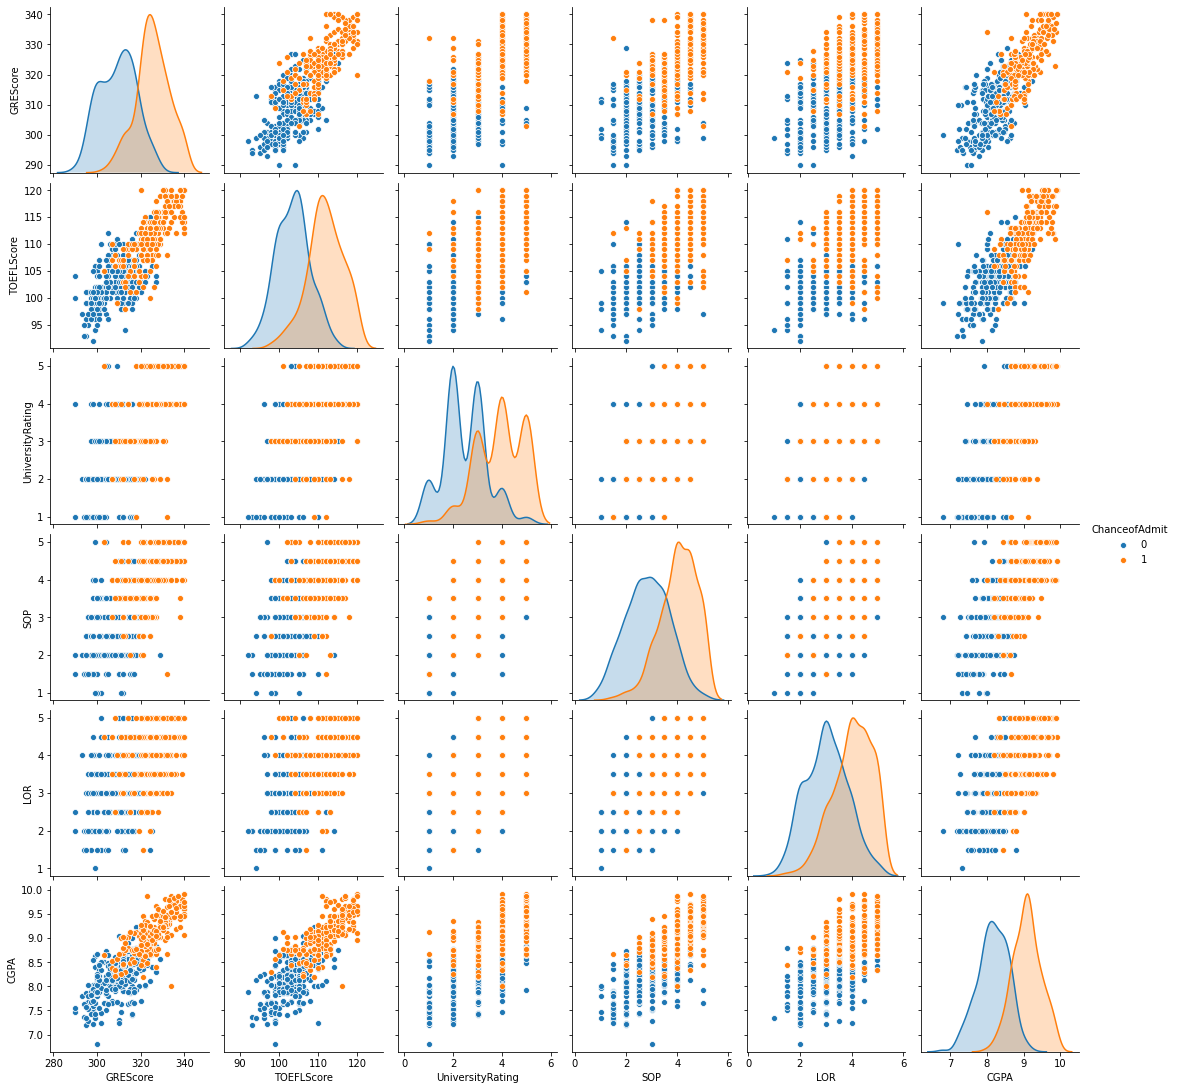

In [28]:
sns.pairplot(df,hue='ChanceofAdmit')  #Showing the relation with various parameters

In [29]:
# Converting the DataFrames to Numpy arrays 
x = df.drop('ChanceofAdmit', axis=1).values
y = df['ChanceofAdmit'].values

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# To scale the values to 0 mean and unit variance
scl_x = StandardScaler().fit(x)
x_scaled = scl_x.transform(x)
x_scaled

array([[ 1.81923762,  1.77886545,  0.77558214,  1.13735981,  1.09894429,
         1.77680627],
       [ 0.66714832, -0.03160087,  0.77558214,  0.63231549,  1.09894429,
         0.48585943],
       [-0.0418297 , -0.52536441, -0.09979274, -0.37777315,  0.01730621,
        -0.95404281],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702,  1.13735981,  1.63976333,
         1.62785086],
       [-0.39631872, -0.68995225,  0.77558214,  0.63231549,  1.63976333,
        -0.24236699],
       [ 0.93301508,  0.95592621,  0.77558214,  1.13735981,  1.09894429,
         0.76721964]])

In [32]:
#Splitting the data into two parts: Train set, Test set (Dev set)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size = 0.8, random_state=42)

In [33]:
print(f'train: {x_train.shape[0]}\ntest: {x_test.shape[0]}')

train: 400
test: 100


In [34]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

<p id=10><h3>Logistic regression</h3></p>

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression(penalty='l1',solver='saga')
lr.fit(x_train,y_train)
y_hat_test = lr.predict(x_test)
y_hat_train= lr.predict(x_train)

In [37]:
lr_test_acc = metrics.accuracy_score(y_test,y_hat_test)
lr_train_acc = metrics.accuracy_score(y_train,y_hat_train)
print(f'Training set accuracy: {lr_train_acc}\nTest Set Accuracy: {lr_test_acc}')

Training set accuracy: 0.89
Test Set Accuracy: 0.9


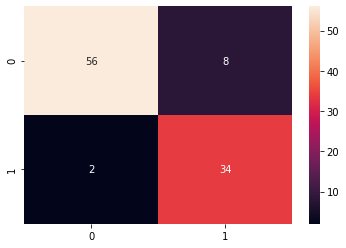

In [38]:
lr_mat = metrics.confusion_matrix(y_test,y_hat_test)
sns.heatmap(lr_mat,annot=True)

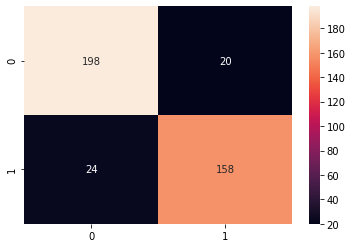

In [39]:
lr_mat = metrics.confusion_matrix(y_train,y_hat_train)
sns.heatmap(lr_mat,annot=True, fmt='1d')

In [40]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        64
           1       0.81      0.94      0.87        36

    accuracy                           0.90       100
   macro avg       0.89      0.91      0.89       100
weighted avg       0.91      0.90      0.90       100



<p id=11><h3>Support Vector Classifier</h3></p>

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC().fit(x_train,y_train)
y_hat_test = svc.predict(x_test)
y_hat_train = svc.predict(x_train)

In [43]:
lr_test_acc = metrics.accuracy_score(y_test,y_hat_test)
lr_train_acc = metrics.accuracy_score(y_train,y_hat_train)
print(f'Training set accuracy: {lr_train_acc}\nTest Set Accuracy: {lr_test_acc}')

Training set accuracy: 0.9
Test Set Accuracy: 0.89


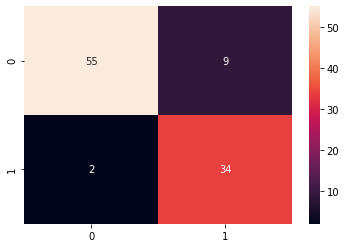

In [44]:
lr_mat = metrics.confusion_matrix(y_test,y_hat_test)
sns.heatmap(lr_mat,annot=True)

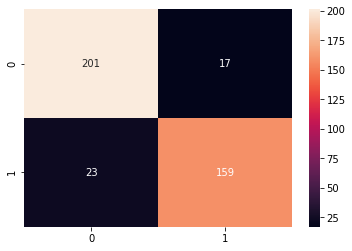

In [45]:
lr_mat = metrics.confusion_matrix(y_train,y_hat_train)
sns.heatmap(lr_mat,annot=True, fmt='1d')

In [46]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        64
           1       0.79      0.94      0.86        36

    accuracy                           0.89       100
   macro avg       0.88      0.90      0.88       100
weighted avg       0.90      0.89      0.89       100



<p id=12><h3>Decision Tree Classifier</h3></p>

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtc = DecisionTreeClassifier().fit(x_train,y_train)
y_hat_test = dtc.predict(x_test)
y_hat_train= dtc.predict(x_train)

In [49]:
lr_test_acc = metrics.accuracy_score(y_test,y_hat_test)
lr_train_acc = metrics.accuracy_score(y_train,y_hat_train)
print(f'Training set accuracy: {lr_train_acc}\nTest Set Accuracy: {lr_test_acc}')

Training set accuracy: 1.0
Test Set Accuracy: 0.84


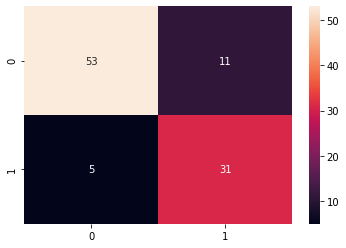

In [50]:
lr_mat = metrics.confusion_matrix(y_test,y_hat_test)
sns.heatmap(lr_mat,annot=True)

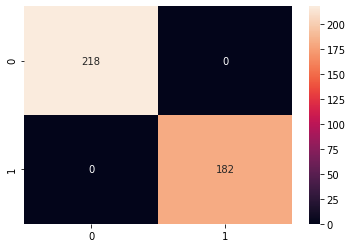

In [51]:
lr_mat = metrics.confusion_matrix(y_train,y_hat_train)
sns.heatmap(lr_mat,annot=True, fmt='1d')

In [52]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        64
           1       0.74      0.86      0.79        36

    accuracy                           0.84       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.85      0.84      0.84       100



<p id=13><h3>Random Forest Classifier</h3></p>

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
parameters = [{
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'n_estimators': np.arange(10, 20)
    },
]

In [55]:
gs_rf = GridSearchCV(RandomForestClassifier(), parameters, scoring='accuracy')
gs_rf.fit(x_train,y_train)
gs_rf.best_params_

{'max_depth': 1, 'min_samples_split': 4, 'n_estimators': 12}

In [56]:
rfc =  RandomForestClassifier(max_depth=2, min_samples_split=4, n_estimators= 16)
rfc.fit(x_train, y_train)
y_hat_test = rfc.predict(x_test)
y_hat_train = rfc.predict(x_train)

In [57]:
lr_test_acc = metrics.accuracy_score(y_test,y_hat_test)
lr_train_acc = metrics.accuracy_score(y_train,y_hat_train)
print(f'Training set accuracy: {lr_train_acc}\nTest Set Accuracy: {lr_test_acc}')

Training set accuracy: 0.905
Test Set Accuracy: 0.9


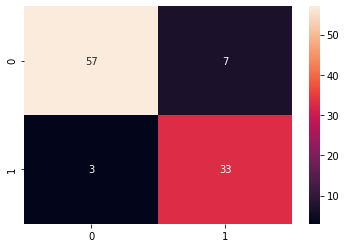

In [58]:
lr_mat = metrics.confusion_matrix(y_test,y_hat_test)
sns.heatmap(lr_mat,annot=True)

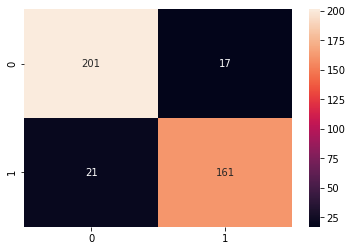

In [59]:
lr_mat = metrics.confusion_matrix(y_train,y_hat_train)
sns.heatmap(lr_mat,annot=True, fmt='1d')

In [60]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        64
           1       0.82      0.92      0.87        36

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.91      0.90      0.90       100



<p id=14><h3>Gradient Boosting Classifier</h3></p>

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
parameters = [
{
    'learning_rate': np.arange(0.1,0.2,0.01),
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]

In [63]:
gs_gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
gs_gbc.fit(x_train,y_train)
gs_gbc.best_params_

{'learning_rate': 0.18999999999999995, 'n_estimators': 3, 'random_state': 0}

In [64]:
gbc = GradientBoostingClassifier(learning_rate= 0.19, n_estimators= 3, random_state= 0)
gbc.fit(x_train,y_train)
y_hat_test = gbc.predict(x_test)
y_hat_train= gbc.predict(x_train)

In [65]:
lr_test_acc = metrics.accuracy_score(y_test,y_hat_test)
lr_train_acc = metrics.accuracy_score(y_train,y_hat_train)
print(f'Training set accuracy: {lr_train_acc}\nTest Set Accuracy: {lr_test_acc}')

Training set accuracy: 0.9175
Test Set Accuracy: 0.88


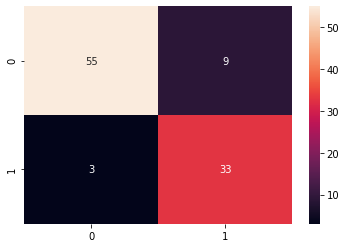

In [66]:
lr_mat = metrics.confusion_matrix(y_test,y_hat_test)
sns.heatmap(lr_mat,annot=True)

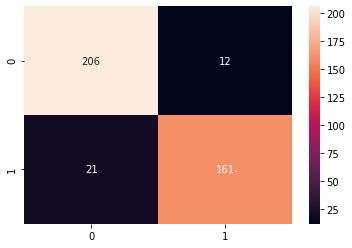

In [67]:
lr_mat = metrics.confusion_matrix(y_train,y_hat_train)
sns.heatmap(lr_mat,annot=True, fmt='1d')

In [68]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        64
           1       0.79      0.92      0.85        36

    accuracy                           0.88       100
   macro avg       0.87      0.89      0.87       100
weighted avg       0.89      0.88      0.88       100



<p id=15><h3>Naive Bayes</h3></p>

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
gnb = GaussianNB().fit(x_train,y_train)
y_hat_test = gnb.predict(x_test)
y_hat_train= gnb.predict(x_train)

In [71]:
lr_test_acc = metrics.accuracy_score(y_test,y_hat_test)
lr_train_acc = metrics.accuracy_score(y_train,y_hat_train)
print(f'Training set accuracy: {lr_train_acc}\nTest Set Accuracy: {lr_test_acc}')

Training set accuracy: 0.8775
Test Set Accuracy: 0.88


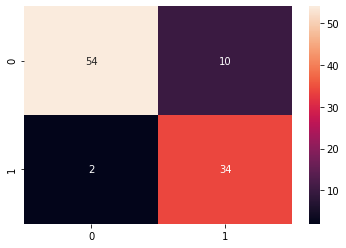

In [72]:
lr_mat = metrics.confusion_matrix(y_test,y_hat_test)
sns.heatmap(lr_mat,annot=True)

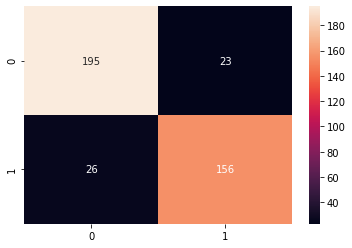

In [73]:
lr_mat = metrics.confusion_matrix(y_train,y_hat_train)
sns.heatmap(lr_mat,annot=True, fmt='1d')

In [74]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        64
           1       0.77      0.94      0.85        36

    accuracy                           0.88       100
   macro avg       0.87      0.89      0.88       100
weighted avg       0.90      0.88      0.88       100



<p id=16><h3>K Nearest Neighbours</h3></p>

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
parameters=[{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]

In [77]:
gs_knn = GridSearchCV(KNeighborsClassifier(), parameters, scoring='accuracy').fit(x_train,y_train)
gs_knn.best_params_

{'n_jobs': 2, 'n_neighbors': 25}

In [78]:
knn = KNeighborsClassifier(n_neighbors= 25, n_jobs= 2).fit(x_train,y_train)
y_hat_test = knn.predict(x_test)
y_hat_train= knn.predict(x_train)

In [79]:
lr_test_acc = metrics.accuracy_score(y_test,y_hat_test)
lr_train_acc = metrics.accuracy_score(y_train,y_hat_train)
print(f'Training set accuracy: {lr_train_acc}\nTest Set Accuracy: {lr_test_acc}')

Training set accuracy: 0.885
Test Set Accuracy: 0.89


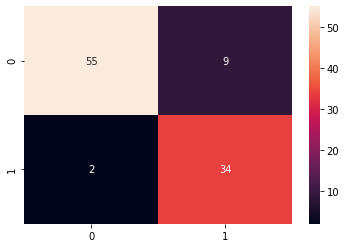

In [80]:
lr_mat = metrics.confusion_matrix(y_test,y_hat_test)
sns.heatmap(lr_mat,annot=True)

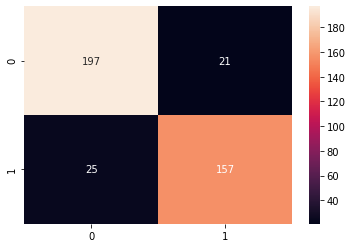

In [81]:
lr_mat = metrics.confusion_matrix(y_train,y_hat_train)
sns.heatmap(lr_mat,annot=True, fmt='1d')

In [82]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        64
           1       0.79      0.94      0.86        36

    accuracy                           0.89       100
   macro avg       0.88      0.90      0.88       100
weighted avg       0.90      0.89      0.89       100



<p id=17><h3>Gaussian Process Classifier</h3></p>

In [83]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [84]:
gpc = GaussianProcessClassifier(random_state=42).fit(x_train,y_train)
y_hat_test = gpc.predict(x_test)
y_hat_train= gpc.predict(x_train)

In [85]:
lr_test_acc = metrics.accuracy_score(y_test,y_hat_test)
lr_train_acc = metrics.accuracy_score(y_train,y_hat_train)
print(f'Training set accuracy: {lr_train_acc}\nTest Set Accuracy: {lr_test_acc}')

Training set accuracy: 0.9075
Test Set Accuracy: 0.88


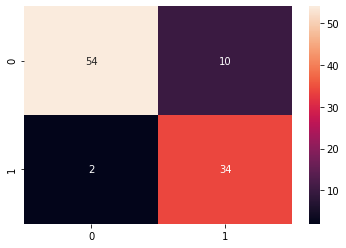

In [86]:
lr_mat = metrics.confusion_matrix(y_test,y_hat_test)
sns.heatmap(lr_mat,annot=True)

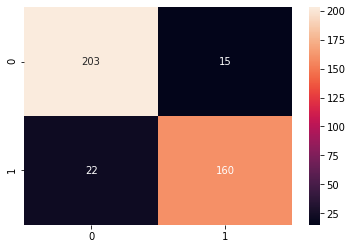

In [87]:
lr_mat = metrics.confusion_matrix(y_train,y_hat_train)
sns.heatmap(lr_mat,annot=True, fmt='1d')

In [88]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        64
           1       0.77      0.94      0.85        36

    accuracy                           0.88       100
   macro avg       0.87      0.89      0.88       100
weighted avg       0.90      0.88      0.88       100



<p id=18><h3>AdaBoost Classifier</h3></p>

In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
parameters=[{
    'learning_rate':np.arange(0.5,0.7,.01),
    'random_state':[0]
            }]

In [91]:
gs_abc = GridSearchCV(AdaBoostClassifier(),parameters,scoring='accuracy').fit(x_train,y_train)
gs_abc.best_params_

{'learning_rate': 0.6400000000000001, 'random_state': 0}

In [92]:
abc = AdaBoostClassifier(learning_rate=0.64, random_state=0).fit(x_train,y_train)
y_hat_test = abc.predict(x_test)
y_hat_train= abc.predict(x_train)

In [93]:
lr_test_acc = metrics.accuracy_score(y_test,y_hat_test)
lr_train_acc = metrics.accuracy_score(y_train,y_hat_train)
print(f'Training set accuracy: {lr_train_acc}\nTest Set Accuracy: {lr_test_acc}')

Training set accuracy: 0.915
Test Set Accuracy: 0.88


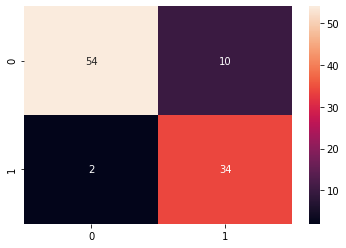

In [94]:
lr_mat = metrics.confusion_matrix(y_test,y_hat_test)
sns.heatmap(lr_mat,annot=True)

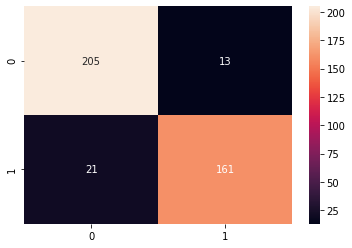

In [95]:
lr_mat = metrics.confusion_matrix(y_train,y_hat_train)
sns.heatmap(lr_mat,annot=True, fmt='1d')

In [96]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        64
           1       0.77      0.94      0.85        36

    accuracy                           0.88       100
   macro avg       0.87      0.89      0.88       100
weighted avg       0.90      0.88      0.88       100



<p id=19><h3>Multi-layer Perceptron Classifier</h3></p>

This is based on Deep Learning. But this classifier is slightly random, as it fits to the data very well sometimes but others, it might converge into a local optima and stop really fast. You have to be carefull with this.

In [97]:
from sklearn.neural_network import MLPClassifier

In [98]:
parameters = [{
    'hidden_layer_sizes':[(100,2,1,)],
    'alpha': [2],
    'learning_rate_init': [10.0 ** -2],
    'max_iter': [1500],
}]

In [99]:
gs_mlpc = GridSearchCV(MLPClassifier(), parameters, scoring='accuracy').fit(x_train,y_train)
gs_mlpc.best_params_

{'alpha': 2,
 'hidden_layer_sizes': (100, 2, 1),
 'learning_rate_init': 0.01,
 'max_iter': 1500}

In [100]:
gs_mlpc.best_score_

0.82

In [101]:
mlpc = MLPClassifier(hidden_layer_sizes=(100,2,1,),
                     alpha=2, 
                     learning_rate_init=10.0 ** -2,
                     max_iter= 1500,
                     batch_size= 128,
                     tol= 0.0000001,
                     verbose=True
                    )
mlpc.fit(x_train,y_train)
y_hat_test = mlpc.predict(x_test)
y_hat_train= mlpc.predict(x_train)

Iteration 1, loss = 0.83362536
Iteration 2, loss = 0.78538419
Iteration 3, loss = 0.75666993
Iteration 4, loss = 0.73588970
Iteration 5, loss = 0.72144222
Iteration 6, loss = 0.71220677
Iteration 7, loss = 0.70613662
Iteration 8, loss = 0.70233369
Iteration 9, loss = 0.69948035
Iteration 10, loss = 0.69764620
Iteration 11, loss = 0.69651719
Iteration 12, loss = 0.69506044
Iteration 13, loss = 0.69434040
Iteration 14, loss = 0.69343275
Iteration 15, loss = 0.69284418
Iteration 16, loss = 0.69236627
Iteration 17, loss = 0.69201214
Iteration 18, loss = 0.69173301
Iteration 19, loss = 0.69148808
Iteration 20, loss = 0.69124378
Iteration 21, loss = 0.69100551
Iteration 22, loss = 0.69074972
Iteration 23, loss = 0.69048922
Iteration 24, loss = 0.69025164
Iteration 25, loss = 0.68999126
Iteration 26, loss = 0.68975391
Iteration 27, loss = 0.68970118
Iteration 28, loss = 0.68961530
Iteration 29, loss = 0.68955735
Iteration 30, loss = 0.68949756
Iteration 31, loss = 0.68942868
Iteration 32, los

In [102]:
lr_test_acc = metrics.accuracy_score(y_test,y_hat_test)
lr_train_acc = metrics.accuracy_score(y_train,y_hat_train)
print(f'Training set accuracy: {lr_train_acc}\nTest Set Accuracy: {lr_test_acc}')

Training set accuracy: 0.545
Test Set Accuracy: 0.64


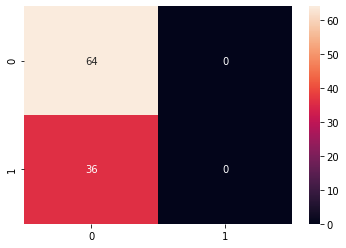

In [103]:
lr_mat = metrics.confusion_matrix(y_test,y_hat_test)
sns.heatmap(lr_mat,annot=True)

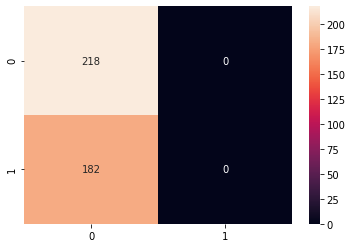

In [104]:
lr_mat = metrics.confusion_matrix(y_train,y_hat_train)
sns.heatmap(lr_mat,annot=True, fmt='1d')

In [105]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        64
           1       0.00      0.00      0.00        36

    accuracy                           0.64       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.41      0.64      0.50       100



/home/glitch/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<p id=20><h2>Conclusion</h2></p>

<table border=2>
<tr>
<th>Algorithm</th>
<th>Train Set</th>
<th>Test Set</th>
</tr>
    
<tr>
<td>Logistic Regression</td>
<td>0.89</td>
<td>0.90</td>
</tr>


<tr>
<td>SVC</td>
<td>0.9</td>
<td>0.89</td>
</tr>
   
<tr>
<td>Decision Tree Classifier</td>
<td>1</td>
<td>0.84</td>
</tr>

<tr>
<td>Random Forrest Classifier</td>
<td>0.89</td>
<td>0.92</td>
</tr>

<tr>
<td>Gradient Boosting Classifier</td>
<td>0.92</td>
<td>0.88</td>
</tr>
    
<tr>
<td>Naive Bayes</td>
<td>0.88</td>
<td>0.88</td>
</tr>

<tr>
<td>KNN</td>
<td>0.89</td>
<td>0.89</td>
</tr>

<tr>
<td>Gaussian Process Classifier</td>
<td>0.91</td>
<td>0.88</td>
</tr>

<tr>
<td>AdaBoost Classifier</td>
<td>0.92</td>
<td>0.88</td>
</tr>
    
<tr>
<td>MLP Classifier</td>
<td>0.89</td>
<td>0.91</td>
</tr>
    
</table>

As we can see from the table, the **Random Forest Classifer** is the best classifier on this dataset. <br><br>Note that, the MLP classifier is an all time favorite and has peak training set performance of 1 and peak test set performance of 0.93 but they never occur simultaneously.

<p id=21><h2>References</h2></p>

<p>Link : https://www.kaggle.com/mohansacharya/graduate-admissions</p>
<p>reference: https://www.kaggle.com/kralmachine/analyzing-the-graduate-admission-eda-ml</p>
<h3>Context<h3>
<p>This dataset is created for prediction of Graduate Admissions from an Indian perspective.

<h3>Content</h3>
<p>The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )</p>

<h3>Acknowledgements</h3>
<p>This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format. The dataset is owned by Mohan S Acharya.</p>

<h3>Inspiration</h3>
<p>This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.</p>

<h3>Citation</h3>
<p>Please cite the following if you are interested in using the dataset : Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019</p>